In [1]:
import tweepy
import os

In [2]:
consumer_key='HTweNEwcrepTkMCFSDy3UhIaZ'
consumer_secret='Fw4SFCPRCLbNI24aj9Lrt0MlmtPmFzWJSiTKHgy9jEZcGs4v4y'
access_token='1420224935218204675-20CpfLkFDzGSo9VRGTUdjsyC9hPSzz'
access_token_secret='jJoXopefTquOkj3xDOdLYQh4RxVGl6JPQqYHt5yqI2SRZ'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [4]:
auth.set_access_token(access_token, access_token_secret)

In [5]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [23]:
keyword='이재명'
startdate='2021-09-01'

In [24]:
wfile = open(os.getcwd()+"/twitter_{}_{}.csv".format(keyword,startdate), mode='a',encoding='utf-8-sig')

In [25]:
cursor=tweepy.Cursor(api.search,
                     q=keyword,
                     since=startdate,
                     count=100)

In [26]:
for i, tweet in enumerate(cursor.items()):
    print("{}:{}--{}".format(i,tweet.text,tweet.created_at))
    wfile.write(tweet.text)

In [27]:
wfile.close()   

# 트위터 감정분석

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from konlpy.tag import Okt
import csv

In [84]:
stopwords=pd.read_csv("불용어.csv",encoding='utf-8')
stopwords=list(stopwords['단어'])

In [85]:
df=pd.read_csv(os.getcwd()+"/twitter_{}_{}.csv".format(keyword,startdate),sep='\n',header=None)

In [86]:
df

,0
0,RT @PuppyOverFlower: “이번 논란의 시발점이 여성 중심의 이른바 여...
1,김…RT @PuppyOverFlower: “이번 논란의 시발점이 여성 중심의 이른바...
2,김…RT @PuppyOverFlower: “이번 논란의 시발점이 여성 중심의 이른바...
3,김…RT @athmtg1: 출처 - 한겨레
4,"제목 - 30분 전, 이준석의 돌발 보이콧…언론중재법 ‘100분 토론’ 결방"
...,...
40965,무엇을
40966,민주당보다 세게 한다라는 거죠?
40967,이준석
40968,끝까지 지켜보마


In [87]:
table=dict()
with open("polarity.csv",'r',-1,'ANSI') as polarity:
    next(polarity)
    for line in csv.reader(polarity):
        key=str()
        for word in line[0].split(';'):
            key+=word.split('/')[0]
        table[key]={'Neg':line[3], 'Neut': line[4], 'Pos':line[6]}

In [88]:
score=pd.DataFrame(columns=['Negative','Neutral','Positive'])

In [89]:
news = df[0].replace('[^0-9a-zA-Zㄱ-힗. ]', '')

In [90]:
news=news.replace('[^0-9a-zA-Zㄱ-힗. ]', '')

In [91]:
okt=Okt()
tokens=[]
for article in news:
    temp=okt.morphs(article)
    temp=[word for word in temp if not word in stopwords]
    #temp= [(i[0]+'/'+i[1]) for i in temp]
    tokens.append(temp)

In [92]:
neg_list=[]
neut_list=[]
pos_list=[]
word_list=[word for sublist in tokens for word in sublist]
for token in tokens:
    neg=0
    neut=0
    pos=0
    for word in token:
        if word in table:
            neg+=float(table[word]['Neg'])
            neut+=float(table[word]['Neut'])
            pos+=float(table[word]['Pos'])

    neg_list.append(neg)
    neut_list.append(neut)
    pos_list.append(pos)
score['Negative']=neg_list
score['Neutral']=neut_list
score['Positive']=pos_list

In [93]:
score.to_csv('score_twitter.csv')

In [94]:
neg_sum=sum(score['Negative'])
neut_sum=sum(score['Neutral'])
pos_sum=sum(score['Positive'])

In [95]:
neg_sum

103087.99558539026

In [96]:
neut_sum

14363.953045620457

In [97]:
pos_sum

116496.21602173176

In [98]:
%matplotlib inline

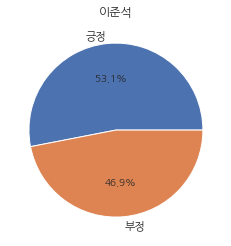

<Figure size 432x288 with 0 Axes>

In [99]:
#폰트 이름 얻어오기
'''import matplotlib
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)'''

poscount = score['Positive'].sum()
negcount = score['Negative'].sum()
ratio = [poscount, negcount]
names = ['긍정', '부정']
plt.title(keyword)
plt.pie(ratio, labels=names, autopct="%.1f%%")
plt.show()
plt.savefig('감성분석결과_트위터_{}.png'.format(keyword))

# 키워드 빈도수

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from collections import Counter
from PIL import Image
import numpy as np

In [ ]:
okt=Okt()
tokens=[]
for article in news:
    temp=okt.nouns(article)
    temp=[word for word in temp if not word in stopwords]
    tokens.append(temp)  

In [ ]:
tokens=[item for sublist in tokens for item in sublist]

In [ ]:
for token in tokens:
    if len(token)==1:
        tokens.pop(tokens.index(token))

In [ ]:
for token in tokens:
    if token=='무니':
        tokens[tokens.index(token)]='터무니'

In [ ]:
counts=Counter(tokens)

In [ ]:
counts=sorted(counts.items(), key=lambda x : x[1],reverse=True)

In [ ]:
counts

In [ ]:
image=Image.open("C:/Users/user/Pictures/wordcloud3.png")
mask=np.array(image)

In [ ]:
wc = WordCloud(mask=mask,font_path="C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/현대체Medium.ttf",stopwords=stopwords,background_color="white",max_font_size=1500)

In [ ]:
cloud = wc.generate_from_frequencies(dict(counts))

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()
#cloud.to_file('test.jpg')

In [10]:
import ssl
print(ssl.OPENSSL_VERSION)

OpenSSL 1.1.1h  22 Sep 2020
